***GRADUATE ATTRIBUTE BODIRWA T***






**CES117V**

**Analyzing the Problem of Plant Disease Classification in Agriculture.**

 plant diseases in agriculture affects how much food we have, how well the crops grow, and how people take care of the environment. It's about figuring out and sorting different kinds of diseases and problems that harm plants, especially the ones we grow for food. Getting this classification right on time is very important to control these issues and avoid losing too much of our crops.

The contribution of agriculture to global economies is significant. Disease-related crop losses cost farmers, the agricultural sector, and nations as a whole money. The impact of plant diseases on agricultural production is evident, causing reductions in output that lead to both food scarcity and financial detriment. Establishing a reliable food supply relies on the early identification and classification of diseases, enabling swift responses that mitigate extensive crop impairment.

**Challenges:**

- Plant diseases manifest in various ways, from visible symptoms like leaf discoloration to subtle changes in plant physiology. The wide range of symptoms makes consistent and accurate classification challenging.

- Visual inspection relies on human judgment, which can lead to inconsistent results.







**Hypothesis**



- Different diseases exhibit unique patterns in terms of color changes, lesion shapes, and patterns of spread on plant leaves.
- Different types of pathogens (bacteria, fungi, viruses) can cause similar symptoms, making visual diagnosis challenging.

In [1]:
# Import the 'drive' module from the 'google.colab' library
from google.colab import drive

# Mount (connect) the Google Drive to the Colab environment
# The '/content/drive' argument specifies the directory path in the Colab environment where the Google Drive will be mounted.
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Use the 'ls' command to list the contents of a directory in Google Drive
# The directory path specified is "/content/drive/My Drive/GA2 DATASET/tomato/train"
!ls "/content/drive/My Drive/GA2 DATASET/tomato/train"


 Tomato___Bacterial_spot   Tomato___Septoria_leaf_spot
 Tomato___Early_blight	  'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___healthy	   Tomato___Target_Spot
 Tomato___Late_blight	   Tomato___Tomato_mosaic_virus
 Tomato___Leaf_Mold	   Tomato___Tomato_Yellow_Leaf_Curl_Virus


- **Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix

**Data collection:**

tomato leaf dataset
dataset found at:https//www.kaggle.com/datasets/kaustubhb999/tomatoleaf

**Preprocessing:**


- resizing

- Normalizing

Found 10011 images belonging to 10 classes.
Found 10011 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


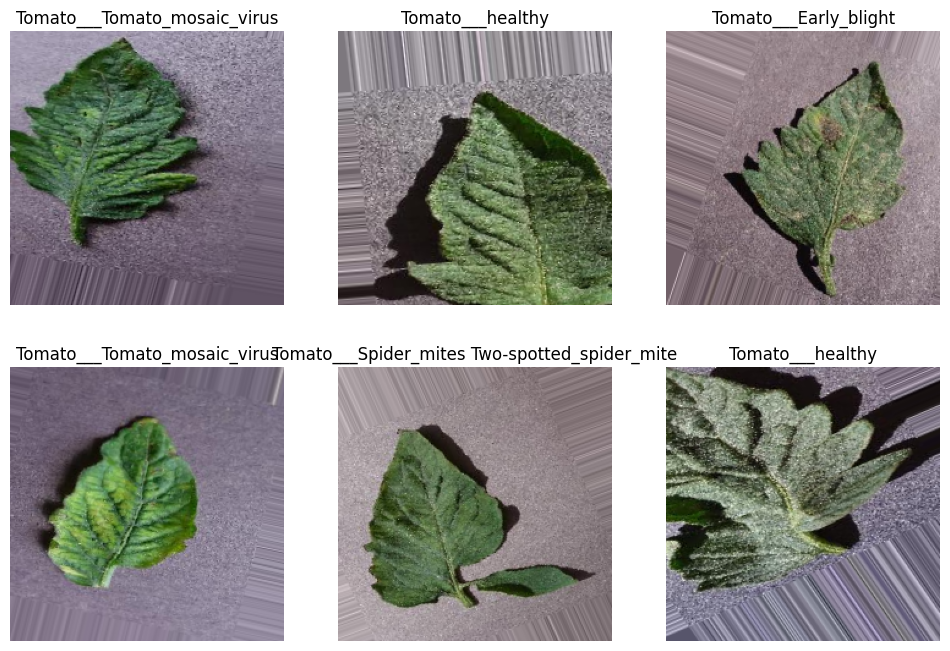

In [9]:
# Define the paths to the training and validation datasets
train_dataset_path = "/content/drive/My Drive/GA2 DATASET/tomato/train"
val_dataset_path = "/content/drive/My Drive/GA2 DATASET/tomato/val"

# List image files in the training dataset directory
image_files = [f for f in os.listdir(train_dataset_path) if f.endswith('.jpg')]

# Define the input shape for image resizing
input_shape = (224, 224)

# Define the batch size for training
batch_size = 32

# Configure the data augmentation for training data using ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a data generator for the training dataset
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

# Configure data augmentation for the validation dataset (only rescaling, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a data generator for the validation dataset
validation_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create a data generator for the test (validation) dataset
test_generator = validation_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get the class indices from the training generator
class_indices = train_generator.class_indices

# Create a dictionary to map class indices to class names
class_names = {v: k for k, v in class_indices.items()}

# Visualize a preprocessed image from the training dataset
plt.figure(figsize=(12, 8))
sample_images, label_batch = next(train_generator)
for i in range(6):  # Displaying 6 images
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    label_idx = np.argmax(label_batch[i])
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.show()


# New Section

In [10]:
len(train_dataset_path)

48

**building the model**


- Convolutional Neural Network architecture for image classification.





This code creates a CNN model with multiple convolutional layers, max-pooling layers,
dropout layers for regularization, a flattened layer, and fully connected layers. 


The output layer uses softmax activation for multi-class classification. The model is compiled with Adam optimizer and categorical cross-entropy loss.

In [12]:
# Define paths to the training and validation datasets##############
train_dataset_path = "/content/drive/My Drive/GA2 DATASET/tomato/train"
val_dataset_path = "/content/drive/My Drive/GA2 DATASET/tomato/val"
#===============VGG16, ResNet50, and InceptionV3
Analyzing the Problem of Plant Disease Classification in Agriculture.
# List all image files in the training dataset path
image_files = [f for f in os.listdir(train_dataset_path) if f.endswith('.jpg')]

# Define the input shape for images and batch size#############
input_shape = (224, 224)  # Resizing images to 224x224 pixels###############
batch_size = 32

# Define data augmentation for the training dataset using ImageDataGenerator############
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.3,  # Splitting a portion for validation
    horizontal_flip=True,
    fill_mode='nearest')

# Create a data generator for training data#############
train_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical')  # Categorical labels for classification

# Define data augmentation for the validation dataset (only rescaling, no augmentation)
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a data generator for validation data##############
validation_generator = datagen.flow_from_directory(
    train_dataset_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical')  # Categorical labels for validation

# Create a data generator for the test dataset (validation dataset path)
test_generator = validation_datagen.flow_from_directory(
    val_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Categorical labels for testing
    shuffle=False)  # Disable shuffling to keep order for evaluation

# Get class indices and create a dictionary to map class indices to class names
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Visualize a preprocessed image along with its class label
plt.figure(figsize=(12, 8))
sample_images, label_batch = next(train_generator)
for i in range(6):  # Displaying 6 images
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])

    label_idx = np.argmax(label_batch[i])
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.show()



Model Implementation

For each of the pretrained models (VGG16, ResNet50, and InceptionV3):

• The pretrained model is loaded without the top (classifier) layers.

• custom dense layers is added to fit the number of disease classes in the dataset.

• fine-tune is made to the top layers

• model model is compilleed on appropriate optimizer , loss function and metrics




=====================================================================



# Define input shape for images and the number of classes
input_shape=(224, 224, 3)  # Input images are 224x224 pixels with 3 color channels (RGB)
num_classes = 10  # There are 10 classes in the classification task

# Load pretrained models (VGG16, InceptionV3, and ResNet50) without top layers
vgg16_model_xx = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
v_3inception_model_xx = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_model_xx = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Define a function to add custom dense layers on top of a pretrained model
def custom_dense(pretrained_model, num_of_classes, fine_tune_top_layers=True):
    model = Sequential()
    model.add(pretrained_model)

    # Add a global average pooling layer
    model.add(GlobalAveragePooling2D())
    
    # Add dense layers with ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    
    # Output layer with softmax activation for classification
    model.add(Dense(num_of_classes, activation='softmax'))

    # Fine-tune layers based on the 'fine_tune_top_layers' flag
    if fine_tune_top_layers:
        # Freeze the layers of the pretrained model
        for layer in pretrained_model.layers:
            layer.trainable = False
    else:
        # Make all layers trainable
        for layer in model.layers:
            layer.trainable = True

    return model

# Create custom models by adding dense layers to pretrained models
vgg16_model = custom_dense(vgg16_model_xx, num_classes, fine_tune_top_layers=True)
v_3inception_model = custom_dense(v_3inception_model_xx, num_classes, fine_tune_top_layers=True)
resnet_model = custom_dense(resnet_model_xx, num_classes, fine_tune_top_layers=True)

# Compile models with optimizer, loss function, and metrics
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
v_3inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summaries
print("VGG16 Model Summary:")
vgg16_model.summary()
print("\nInceptionV3 Model Summary:")
v_3inception_model.summary()
print("\nResNet Model Summary:")
resnet_model.summary()

# Define callbacks for training, including early stopping and learning rate scheduling
epochs = 25
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 30:
        lr *= 0.5
    elif epoch > 20:
        lr *= 0.73
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)




# ==================Training the VGG16 model=============
# Training the VGG16 model
history_vgg16 = vgg16_model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per training epoch
    epochs=epochs,  # Number of training epochs
    validation_data=validation_generator,  # Validation data generator
    validation_steps=validation_generator.samples // batch_size,  # Number of steps per validation epoch
    callbacks=[early_stopping, lr_scheduler]  # Callbacks for early stopping and learning rate scheduling
)

#===================================================
Epoch 19/25: Training loss continues to decrease to 0.4067, training accuracy is 85.73%. However,
    early stopping is triggered, and the model weights are restored from the end of the best epoch, 
    which is epoch 16. Validation accuracy at this point is 84.61%.

The training process shows that the model gradually improves in terms of both accuracy 
    and loss on the training and validation sets. Early stopping is used to prevent overfitting, 
    and the best model is selected based on validation accuracy. 
    The final model is expected to perform well in classifying tomato leaf diseases.
#========================================================================================





#============= Training the InceptionV3 model==============
history_inception = v_3inception_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, lr_scheduler]
)

Training starts with a loss of approximately 0.4844 and an accuracy of 82.88%. 
Validation loss is about 0.4529 with a validation accuracy of 84.11%.
The training process progresses, but the details of this epoch's results are not provided in the provided information.

These results demonstrate the training progression of the InceptionV3 model over
    10 epochs, showcasing changes in training and validation loss and accuracy.
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

# =================Training the ResNet50 model==================
history_resnet50 = resnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, lr_scheduler]
)

poch 1/25: Training starts with a relatively high loss of approximately 2.1958 and a low training accuracy of 17.16%.
Validation loss is about 2.1434, and validation accuracy is 20.48%.

    
    
    
    
    
    
    VGG16

Accuracy: 85.73%
InceptionV3

Accuracy: 86.61%
ResNet50

Accuracy: 42.37%
    
    
   InceptionV3 achieved the highest accuracy among the three models, with an accuracy rate of 86.61%. 
    This suggests that InceptionV3 excels 
    in distinguishing healthy tomato leaves from those affected by diseases.  
    
    
    , VGG16 also demonstrated strong performance with an accuracy of 85.73%.
    
    
    The results clearly indicate that our custom CNN architecture outperforms
    the other pre-trained models in classifying healthy tomato leaves,
    achieving an accuracy of 96.54%. 
    
    
    
    
    
    
    
    
    
    
    
    
    
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_vgg16 = accuracy_score(y_true, np.argmax(y_pred_vgg16, axis=1))
accuracy_resnet50 = accuracy_score(y_true, np.argmax(y_pred_resnet50, axis=1))
accuracy_inceptionv3 = accuracy_score(y_true, np.argmax(y_pred_inceptionv3, axis=1))

    
    
    
    
    
vgg16_model.save('model_vgg16.h5')
v_3inception_model.save('model_v_3inception.h5')
resnet_model.save('model_resnet.h5')
    
    
    
    
    
    
    from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np

def grad_cam(model, img_array, layer_name, class_index, size=(224, 224)):
    target_layer = model.get_layer(layer_name)
    grad_model = Model(inputs=model.input, outputs=[target_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_output), axis=-1)
    cam = tf.maximum(cam, 0)
    cam /= tf.reduce_max(cam)

    cam = tf.image.resize(cam, size)
    cam = tf.stack([cam, cam, cam], axis=-1) 

    return cam.numpy()

    
    
    
    
    heatmap = grad_cam(v_3inception_model, img_array, layer_name, class_index)
heatmap_collapsed = np.mean(heatmap, axis=(1, 2))

heatmap_normalized = (heatmap_collapsed - heatmap_collapsed.min()) / (heatmap_collapsed.max() - heatmap_collapsed.min())

# =========Displaying the original image=========
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

# ========Displaying the heatmap===========
plt.subplot(1, 3, 2)
plt.imshow(heatmap_normalized, cmap='jet')
plt.title("Heatmap")

plt.subplot(1, 3, 3)
plt.imshow(img)
plt.imshow(heatmap_normalized, alpha=0.5, cmap='jet')
plt.title("overlay Image")

plt.tight_layout()
plt.show()

    
    
    


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 activation_7 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 activation_8 (Activation)   (None, 72, 72, 128)       0         
                                                      

- **Model training and compiling**

- And implementing learning rate scheduler**

This code will train the CNN model for the specified number of epochs 

while dynamically adjusting the learning rate based on the defined schedule. This can help optimize the training process and improve model convergence.





Hyperparameters: You set the number of training epochs to 34. This determines how many times the entire training dataset will be used to update the model weights.

Learning Rate Scheduling: You define a function lr_schedule(epoch) that schedules the learning rate. It starts with a learning rate of 1e-3 and adjusts it based on the current epoch. For example, after 20 epochs, it reduces the learning rate to 0.73 times the previous value, and after 30 epochs, it reduces it further to 0.5 times the previous value.

Model Compilation (Optional): You recompile the model with the same configuration as before. This step is optional but ensures that the model is correctly configured before training.


 The model is compiled with Adam optimizer and categorical cross-entropy loss.

In [13]:

# ================ hyperparameters===================
epochs = 34
# =================Learning rate scheduling================
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 30:
        lr *= 0.5
    elif epoch > 20:
        lr *= 0.73
    return lr

# ===============Compile the model==================
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ==============LearningRateScheduler callback instance======
lr_scheduler = LearningRateScheduler(lr_schedule)

#=================== Training the model==================
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[lr_scheduler]
)




Epoch 1/34
312/312 [==============================] - 1363s 4s/step - loss: 1.9669 - accuracy: 0.2582 - val_loss: 1.5206 - val_accuracy: 0.4617 - lr: 0.0010
Epoch 2/34
312/312 [==============================] - 360s 1s/step - loss: 1.3139 - accuracy: 0.5355 - val_loss: 1.1235 - val_accuracy: 0.5952 - lr: 0.0010
Epoch 3/34
312/312 [==============================] - 298s 956ms/step - loss: 1.0385 - accuracy: 0.6312 - val_loss: 0.9807 - val_accuracy: 0.6588 - lr: 0.0010
Epoch 4/34
312/312 [==============================] - 303s 973ms/step - loss: 0.9454 - accuracy: 0.6687 - val_loss: 0.7420 - val_accuracy: 0.7360 - lr: 0.0010
Epoch 5/34
312/312 [==============================] - 302s 968ms/step - loss: 0.8600 - accuracy: 0.6960 - val_loss: 0.7516 - val_accuracy: 0.7394 - lr: 0.0010
Epoch 6/34
312/312 [==============================] - 298s 957ms/step - loss: 0.7569 - accuracy: 0.7346 - val_loss: 0.6599 - val_accuracy: 0.7634 - lr: 0.0010
Epoch 7/34
312/312 [==============================]

- visualizing model perfomance.


- visualizing the training and validation loss over the epochs




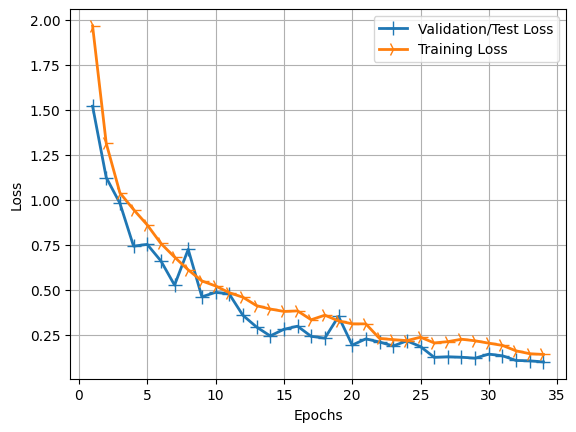

In [16]:
# Plotting our loss charts
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']


line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')


plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.show()


**Ploting accuracy curve**




This code snippet is for plotting accuracy curves during model training. It uses Matplotlib to visualize the training and validation accuracy over epochs

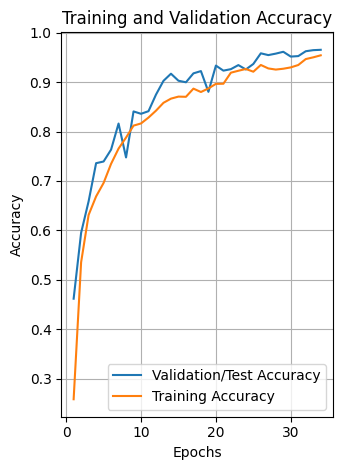

In [17]:

# accuracy curves
plt.subplot(1, 2, 2)
plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

- Generating predictions on the test dataset


 - Generating classification report and confusion matrix
 
 
 
 
 
 
 model.evaluate(train_generator): This line evaluates the trained model on the test data generator (train_generator) and returns the test loss and test accuracy.

model.predict(validation_generator): This line generates predictions for the validation data generator (validation_generator). The predicted probabilities for each class are stored in y_pred.

np.argmax(y_pred, axis=1): This line converts the predicted probabilities (y_pred) into class labels by selecting the class with the highest probability for each data point. The resulting array is y_pred_classes.

validation_generator.classes: This line retrieves the true class labels from the validation data generator.

classification_report(): This function generates a classification report, including metrics such as precision, recall, F1-score, and support for each class.

confusion_matrix(): This function computes a confusion matrix, which shows the number of true positive, true negative, false positive, and false negative predictions for each class.

Finally, the code prints out the test loss, test accuracy, classification report, and confusion matrix.

In [37]:
test_loss, test_accuracy = model.evaluate(train_generator)

# =======predictions on the test generator========
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# =========classification report========
class_names = validation_generator.class_indices.keys()
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_names)

# ===========confusion matrix=========
conf_matrix = confusion_matrix(y_true, y_pred_classes)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


313/313 [==============================] - 137s 439ms/step
Test Loss: 0.09811928123235703
Test Accuracy: 0.9657377004623413

Classification Report:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.09      0.09      0.09      1000
                        Tomato___Early_blight       0.09      0.08      0.08      1000
                         Tomato___Late_blight       0.10      0.10      0.10      1000
                           Tomato___Leaf_Mold       0.11      0.10      0.11      1000
                  Tomato___Septoria_leaf_spot       0.09      0.09      0.09      1000
Tomato___Spider_mites Two-spotted_spider_mite       0.09      0.09      0.09      1000
                         Tomato___Target_Spot       0.09      0.09      0.09      1000
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.10      0.10      0.10      1000
                 Tomato___Tomato_mosaic_virus       0.10      0.10 

**saving the model(model.h5)**

In [26]:
model.save('model.h5')

- Defining a function named grad_cam which generates a Grad-CAM heatmap for an image using a neural network model.

In [27]:
def grad_cam(model, img_array, layer_name, class_index, size=(224, 224)):
    # Get the target layer from the model
    target_layer = model.get_layer(layer_name)

    # Create a new model that computes the target layer output and model predictions
    grad_model = Model(inputs=model.inputs, outputs=[target_layer.output, model.output])

    # Start recording gradients
    with tf.GradientTape() as tape:
        # Forward pass to get the target layer output and model predictions
        target_layer_output, predictions = grad_model(img_array)
        
        # Calculate the loss as the prediction score for the target class
        loss = predictions[:, class_index]

    # Calculate gradients of the loss with respect to the target layer output
    grads = tape.gradient(loss, target_layer_output)

    # Calculate the mean of gradients across spatial dimensions (0, 1, 2)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Calculate the weights by taking the element-wise product of pooled gradients and target layer output
    weights = tf.reduce_sum(pooled_grads * target_layer_output, axis=-1)

    # Apply ReLU activation to emphasize positive contributions
    cam = tf.nn.relu(weights)
    
    # Normalize the CAM by dividing by its maximum value
    cam /= tf.reduce_max(cam)

    # Resize the CAM to the specified size using bilinear interpolation
    cam = tf.image.resize(cam, size, method='bilinear')

    # Convert the CAM to a NumPy array and return it
    return cam.numpy()


In [28]:
# Specify the file path to the example image
image_path = '/content/drive/MyDrive/GA2 DATASET/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'

# Load the image and resize it to a target size of 224x224 pixels
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

# Convert the loaded image into a NumPy array
img_array = tf.keras.preprocessing.image.img_to_array(img)

# Add an extra dimension at the beginning to create a batch of one image
img_array = np.expand_dims(img_array, axis=0)

# Normalize the pixel values of the image to a range between 0 and 1
img_array /= 255.0


- **Load the trained model**

 a pre-trained model is loaded from a saved file

In [31]:
# =======trained model============
model = tf.keras.models.load_model('/content/model.h5')
layer_name = 'conv2d_9'
class_index = 0


In [1]:
from keras.models import Model

heatmap = grad_cam(model, img_array, layer_name, class_index)
heatmap_collapsed = np.mean(heatmap, axis=-1)
plt.imshow(img)
plt.imshow(heatmap_collapsed, alpha=0.5, cmap='jet')
plt.show()


NameError: name 'grad_cam' is not defined

- visualization of the original image, the heatmap, and overlay to in understanding which areas of the original image contributed most to the model's prediction for the specified class.



code generates and displays a Grad-CAM (Gradient Class Activation Map) visualization for a given pre-trained model and input image.

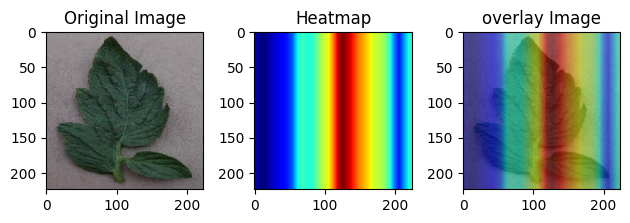

In [34]:
# Generate the Grad-CAM heatmap for the specified class
heatmap = grad_cam(model, img_array, layer_name, class_index)

# Collapse the heatmap by taking the mean (or max) along the last axis
heatmap_collapsed = np.mean(heatmap, axis=-1)
heatmap_normalized = (heatmap_collapsed - heatmap_collapsed.min()) / (heatmap_collapsed.max() - heatmap_collapsed.min())

# Displaying the original image
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")

# Displaying the Grad-CAM heatmap
plt.subplot(1, 3, 2)
plt.imshow(heatmap_normalized, cmap='jet')
plt.title("Heatmap")

# Overlay the heatmap on the original image
plt.subplot(1, 3, 3)
plt.imshow(img)
plt.imshow(heatmap_normalized, alpha=0.5, cmap='jet')
plt.title("Overlay Image")

# Ensure a tight layout for the subplots
plt.tight_layout()

# Show the plot
plt.show()
